# NBA_API: A Regression Example
### CIT 3100
### Marlond Augustin

In [ ]:
# based on https://betterprogramming.pub/using-pythons-nba-api-to-create-a-simple-regression-model-ac9a3b36bc8

# If you want to change whether it prints all output,
# or only the last expression (default behavior)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #"last_expr"#

# First we will import our packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
!pip install nba_api
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 3.8 MB/s eta 0:00:00


### Load in some data

In [ ]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
# help(endpoints.leagueleaders.LeagueLeaders)
data = endpoints.leagueleaders.LeagueLeaders(season='2022-23')

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

# take a sneak peak at the first 5 rows
df.head()
df.columns

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21


Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

### Create new variables from averages

<font color=red>Define `x` as the average field goal attempts per game. (You will need to divide the values of FGA (field goal attempts) by the values of GP (games played). Similarly, define `y` as the average number of points per game for each player (so, divide PTS by GP).</font>

In [ ]:
# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x = df.FGA / df.GP
y = df.PTS / df.GP

<font color = red> First, let's make a scatter plot of our data. You can use the `scatter` command in `matplotlib.pyplot`, which was imported as `plt`. So, do `plt.scatter()` and provide two arguments `x` and `y` in the parentheses.</font>

Text(0.5, 1.0, 'Is there A correlation between Field Goal and the amount of points')

Text(0.5, 0, 'Field Goal Attempts')

Text(0, 0.5, 'Points Per Game')

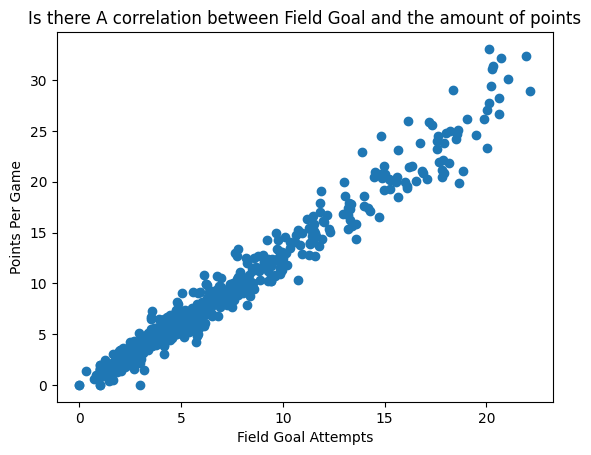

In [ ]:
plt.scatter(x,y)
plt.title('Is there A correlation between Field Goal and the amount of points')            # Give it a title
plt.xlabel('Field Goal Attempts')                              # Label x-axis
plt.ylabel('Points Per Game')

### Reshape data into arrays for LinearRegression

Below, we reshape `x` so that it is a one-dimensional (1D) array. <font color=red> On the line right below, write a similar command to make `y` a 1D array as well.</font>

In [ ]:
# we have to reshape our array from 1d to 2d.
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1) # (-1,1) allows you to reshape to a single column
y = np.array(y).reshape(-1,1)

### Fit the linear regression model

<font color=red>First define a `model` object in Python which will use the LinearRegression() function from linear_model. Then, on the next line, perform a model fit with the reshaped `x` and `y` from above. If you need help, you can copy and paste these two lines of code from the heart rate example.</font>

In [ ]:
# Build and fit linear regression model
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()
model.fit(x,y)


LinearRegression()

<font color=red> Print out the slope and intercept of the regression line using `model.coef_` and `model.intercept_`. </font>

In [ ]:
[model.coef_,model.intercept_]

[array([[1.35551016]]), array([-0.50961072])]

<font color=red>How can you interpret these values based on the context of the data? Fill in the blanks by double clicking the text cell below.</font>

The slope is approximatively 1.36 and can be interpreted as for each field goal attempts, we can see a raise of 1.36 points per game.

The intercept is approximatively -0.51 and can be interpreted when field goal attempts per game is 0, the number of  points per game will be -0.51

### Look at model predictions and model score ($R^2$)

In [ ]:
# Get our r2 value and round it to 3 decimals. How much variance is explained?
# Get our predicted y values for x (this will create the line of best fit)
r2 = round(model.score(x,y), 3)
predicted_y = model.predict(x)

### Check your model assumptions!

We already saw that X and Y have a linear relationship. So, we need to also check to see if the residuals are approximately independent, have constant variance, and look approximately normal.

<font color ="red"> Make a histgram of the residuals. </font>

(array([  2.,   9.,  42., 134., 233.,  84.,  21.,   6.,   7.,   1.]),
 array([-4.8765789 , -3.75783492, -2.63909095, -1.52034697, -0.40160299,
         0.71714099,  1.83588496,  2.95462894,  4.07337292,  5.19211689,
         6.31086087]),
 <BarContainer object of 10 artists>)

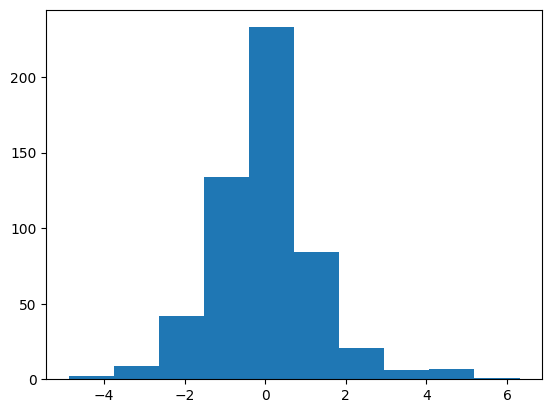

In [ ]:
resid = y - predicted_y
plt.hist(resid)

<font color="red"> Make a scatter plot comparing the predicted Y values with the residuals. </font>

Text(0.5, 1.0, 'y vs resid')

Text(0.5, 0, 'y')

Text(0, 0.5, 'resid')

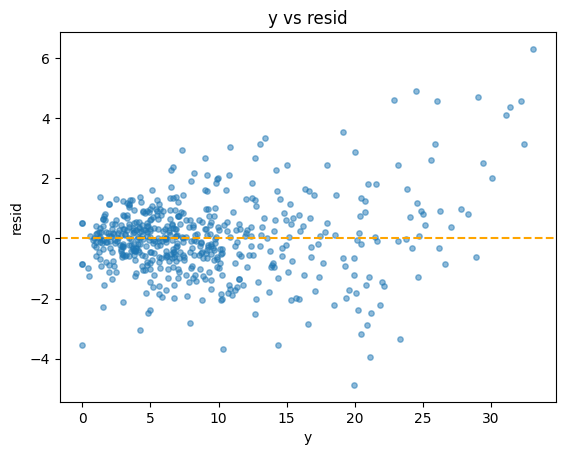

In [ ]:
plt.scatter(y, resid, s=15, alpha=.5)                     # Scatterplot: Specfiy dot size(s) and transparency(alpha)
plt.title('y vs resid')            # Give it a title
plt.xlabel('y')                              # Label x-axis
plt.ylabel('resid')                         # Label y-axis
plt.axhline(0, color = "orange", linestyle = "--")

<font color = "red"> Are the assumptions satisfied? </font>

The assumptions are approximatevly distributed, when the number of points per game is between 0 and 15. After that, it isn't anymore.

### Make a scatter plot and show the regression line

The code below makes a scatter plot of the NBA data. <font color=red> Now, add in a plt.plot() call in order to make the regression line (that is, the predicted y values for each x) appear on top of the scatter plot. You can change the color by adding a `color="black"`or similar call after you provide the appropriate `x` and `y` arguments. Also, add in appropriate axis labels and a title by filling in the blanks below. </font>

Text(0.5, 1.0, 'Scatter plot and correlation with a regression line')

Text(0.5, 0, 'Field Goal Attempts')

Text(0, 0.5, 'Points per game')

Text(10, 25, 'R2=0.965')

Text([14.06756757], [28.06756757], 'Jayson Tatum')

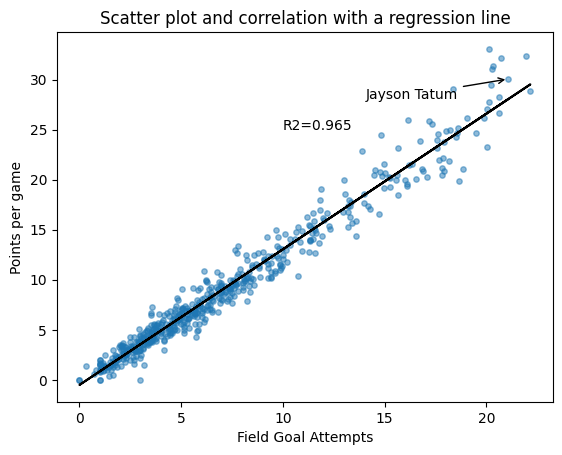

In [ ]:
# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=15, alpha=.5)                     # Scatterplot: Specfiy size(s) and transparency(alpha) of dots
plt.plot(x,predicted_y, color="black")             # line: Add line for regression line w/ predicted values
plt.title('Scatter plot and correlation with a regression line')   # Give it a title
plt.xlabel('Field Goal Attempts')            # Label x-axis
plt.ylabel('Points per game')                         # Label y-axis
plt.text(10,25, f'R2={r2}')                           # 10, 25 are the coordinates for our text. Adjust accordingly

plt.annotate(df.PLAYER[0],                     # This is the top scoring player's name. Refer to .head() from earlier
             (x[0], y[0]),                     # This is the point we want to annotate.
             (x[0]-7,y[0]-2),                  # These are coords for the text
             arrowprops=dict(arrowstyle='->')) # Here we use a flat line for the arrow '-'


# Finally, let's save an image called 'nba_regression.png'.
# We'll set the dpi (dots per inch) to 300, so we have a nice looking picture.
# plt.savefig('nba_regression.png', dpi=300)

<font color=red> From the last line of code, check in your Google Colab files (the folder icon on the left) to see if there is a new image (.png) file showing the regression line we just made (there should be!). </font>

Finally, be sure to click Share and share the file with me or Elms College, so I can grade it! Copy and paste the link to your Colab file into Moodle so I can grade it.